<a href="https://colab.research.google.com/github/KazumaShachou/DataScience/blob/master/Matplotlib_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Geographic Data with Basemap

In [1]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756181 sha256=a114c76384f57e0029565c7d305cb05c4ee659cbbdfdf4205696f33f0879f771
  Stored in directory: /tmp/pip-ephem-wheel-cache-4wu10wgy/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


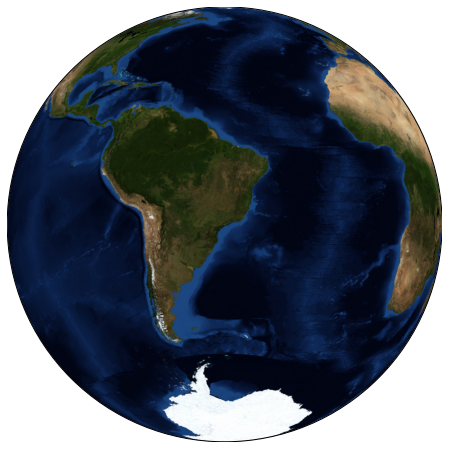

In [3]:
#show world map
plt.figure(figsize=(8, 8))
m = Basemap(projection= 'ortho', resolution=None, lat_0 = -23.6, lon_0=-46.6)
m.bluemarble(scale = 0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


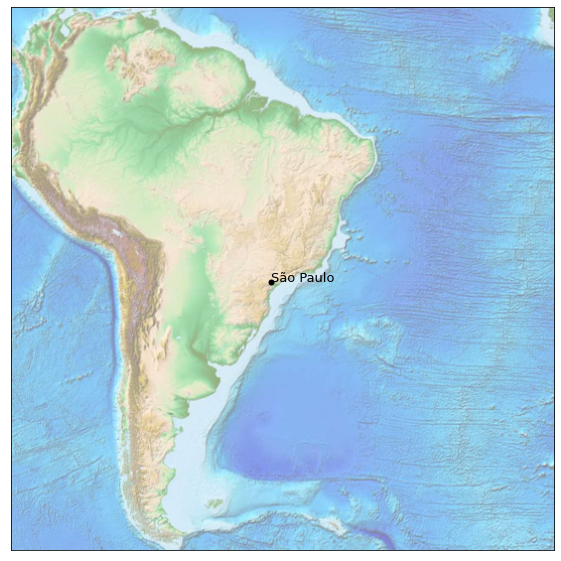

In [4]:
#São paulo
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0 = -23.6, lon_0=-46.6)
m.etopo(scale= 0.5, alpha = 0.5)

x, y = m(-48.3, -24)
plt.plot(x, y, 'ok', markersize = 5)
plt.text(x, y, 'São Paulo', fontsize = 13);

In [5]:
#Map Projections


In [6]:
from itertools import chain

In [20]:
def draw_map(m, scale = 0.2):
  # draw a shaded-relief image
  m.shadedrelief(scale = scale)
  

  #lats and longs are returned as a dictionary
  lats = m.drawparallels(np.linspace(-90,90,13))
  lons = m.drawmeridians(np.linspace(-180, 180, 13))

  # keys contain the plt.Line2D instances
  lat_lines = chain(*(tup[1][0] for tup in lats.items()))
  lon_lines = chain(*(tup[1][0] for tup in lons.items()))
  all_lines = chain(lat_lines, lon_lines)

  # cycle through these lines and set the desired style
  for line in all_lines:
    line.set(linestyle = '-', alpha = 0.3, color = 'w');

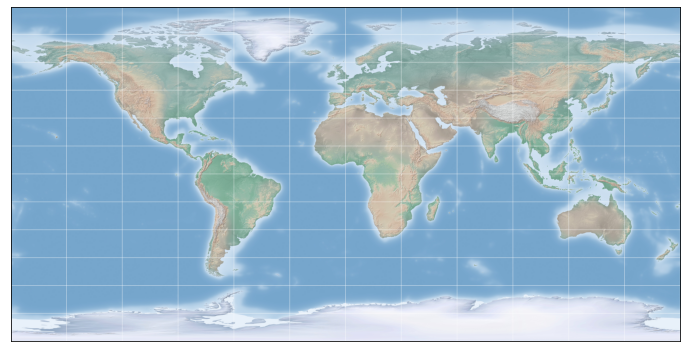

In [21]:
#Cylindrical projections
fig = plt.figure(figsize=(12, 7), edgecolor= 'w')
m = Basemap(projection='cyl', resolution= None, llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon = -180, urcrnrlon = 180)

draw_map(m)

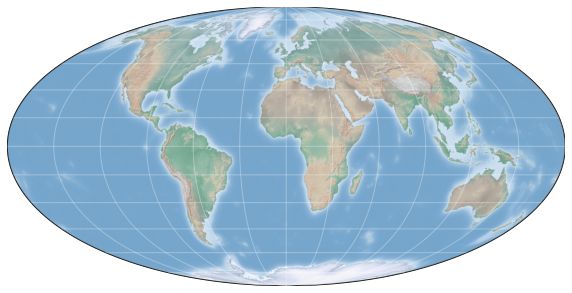

In [22]:
#Pseudo-cylindrical projections
fig = plt.figure(figsize=(10, 6))
m = Basemap(projection='moll', resolution=None, lat_0=0, lon_0=0);
draw_map(m)

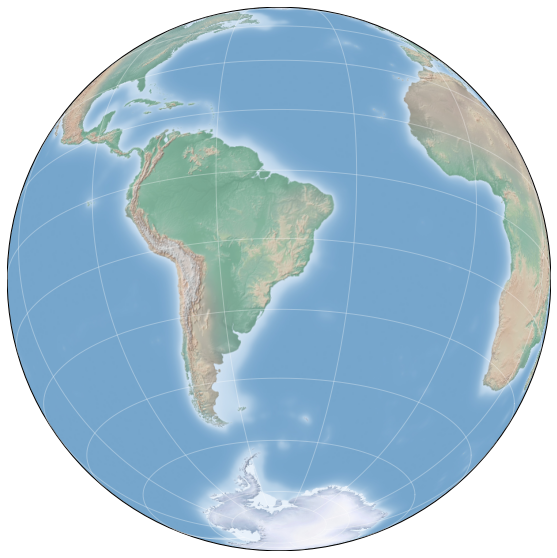

In [23]:
#Perspective projections
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='ortho', resolution=None, lat_0= -23.6, lon_0=-46.6)
draw_map(m)



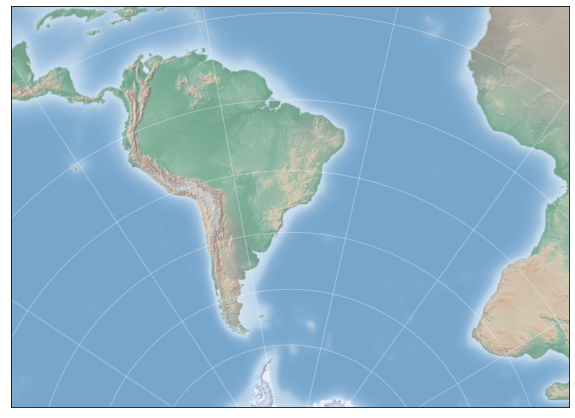

In [24]:
#Conic projections
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='lcc', resolution=None, lon_0=-46.6, lat_0=-23.6, lat_1=-45, lat_2=-55,width=1.67E7 , height=1.2E7, )
draw_map(m)

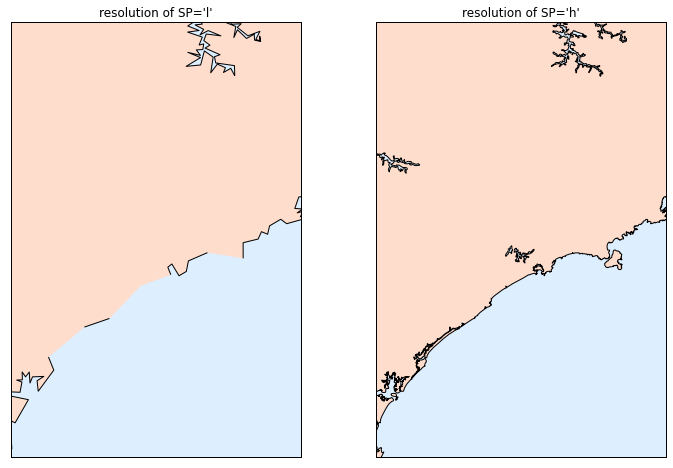

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (12, 8))

for i, res in enumerate(['l', 'h']):
  m = Basemap(projection='gnom', lat_0=-23.6, lon_0=-46.6, width=400000, height=600000, resolution=res, ax=ax[i])
  m.fillcontinents(color='#FFDDCC', lake_color='#DDEEFF')
  m.drawmapboundary(fill_color='#DDEEFF')
  m.drawcoastlines()
  ax[i].set_title("resolution of SP='{0}'".format(res));

In [46]:
#Example: California Cities
import pandas as pd
cities = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/california_cities.csv')
lat = cities['latd'].values
lon = cities['longd'].values

population = cities['population_total'].values
area = cities['area_total_km2'].values


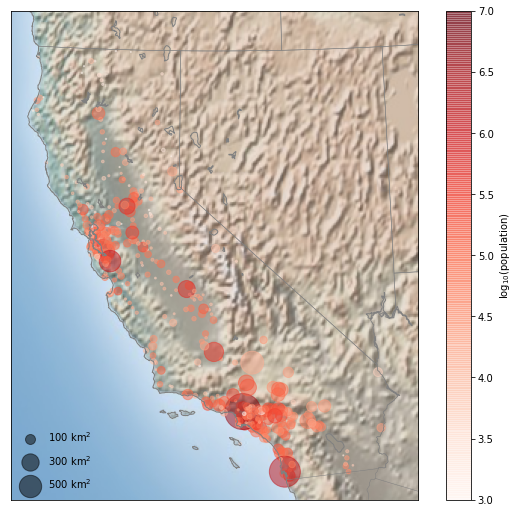

In [53]:
#1. Draw the map background
fig = plt.figure(figsize=(10,9))
m = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color= 'gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon= True, c = np.log10(population), s=area, cmap='Reds', alpha = 0.5)

# 3. create colorbar and legend
plt.colorbar(label= r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
  plt.scatter([],[], c='k', alpha= 0.5, s=a, label = str(a) + ' km$^2$')

plt.legend(scatterpoints= 1, frameon = False, labelspacing= 1, loc = 'lower left');